In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\enes_\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2

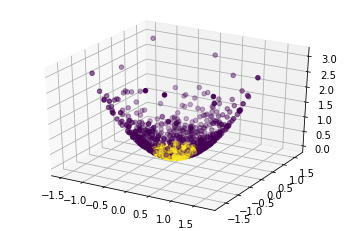

In [3]:
from mpl_toolkits.mplot3d import Axes3D
data['x2_y2'] = data.x**2 + data.y**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)
plt.show()

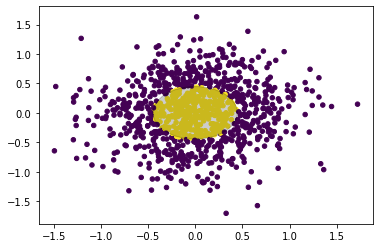

In [4]:
circle1 = plt.Circle((0, 0), np.sqrt(.2), color='k', alpha=.2)

fig, ax = plt.subplots()

ax.scatter(data['x'], data['y'], c=data['d'], s= 20)
ax.add_artist(circle1)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [6]:
df = pd.read_csv("ready-to-use-titanic.csv")
del df["Unnamed: 0"]
x = df.drop(columns="Survived")
y= df["Survived"]
xtr,xte,ytr,yte = train_test_split(x,y)

In [36]:
from sklearn.svm import SVC

svc = SVC(C=1)
parameters ={
    "kernel":["linear","rbf","sigmoid"],
    "degree":[x for x in range(-5,1,1)],
    "shrinking":[True,False],
    "decision_function_shape":["ovo","ovr"],
    "gamma":[10**x for x in range(-20,-10,1)]
    
}
grid_cv = GridSearchCV(svc,param_grid=parameters)
grid_cv.fit(xtr,ytr)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [-5, -4, -3, -2, -1, 0],
                         'gamma': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16, 1e-15,
                                   1e-14, 1e-13, 1e-12, 1e-11],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
from sklearn.metrics import accuracy_score
yhat = grid_cv.predict(xte)
print("Random Forest Accuracy : {:.2f}".format(accuracy_score(yte, yhat)))

Random Forest Accuracy : 0.78


In [38]:
grid_cv.best_params_

{'decision_function_shape': 'ovo',
 'degree': 0,
 'gamma': 1e-20,
 'kernel': 'linear',
 'shrinking': True}